Q4：

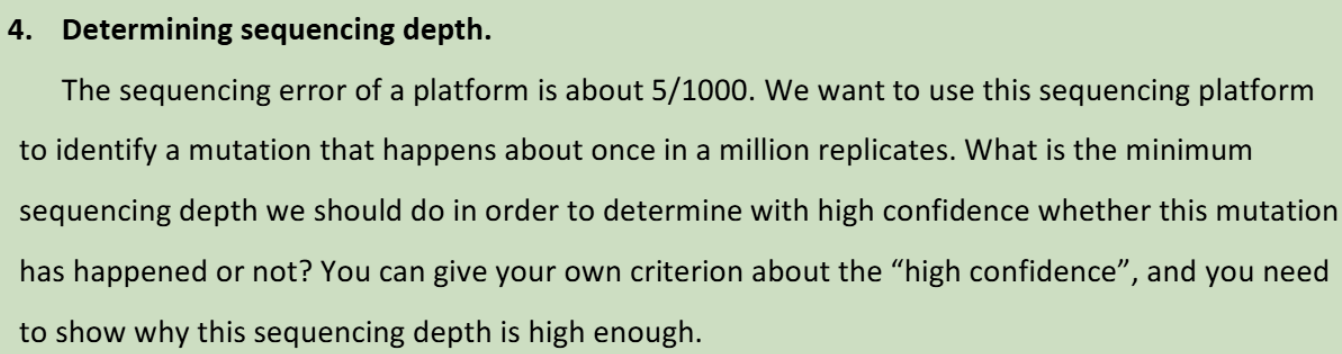

平台的测序误差约为5/1000。我们想用这个测序平台来鉴定一个在一百万次重复中发生一次的突变。为了确定突变是否发生，我们应该做的最小测序深度是什么？你可以给出你自己关于“高置信度”的标准，你需要说明为什么这个排序深度足够高？

在测序错误率（ε=0.005）下检测低频突变（频率θ=10⁻⁶）

问题本质是：

如何根据错误率和突变频率来计算合理的测序深度，以确保能够可靠地检测到低频突变？

实质就是探究测序深度与突变检测置信度之间关系

1，概率模型：以简单的二项分布或者是泊松分布来近似

将测序过程视为一系列独立的伯努利试验，每次试验表示一个碱基被测序。

突变的真实发生概率为 p=1/1000000，测序错误率 q=5/1000=0.005。

设测序深度为 n，即对同一个位置进行 n 次测序。

若在 n 次测序中观察到 k 次突变，则需要确定在给定的置信度下，n 的最小值使得能够区分真实的突变信号与测序错误带来的假阳性信号

假设突变位点覆盖深度为N

真实突变需满足：

观测到突变reads数 ≥ *k*，且排除错误导致的假阳性

置信度要求：假阳性率<0.01（99%置信度）

泊松分布通常被视为当二项分布中的 n 趋近于无穷大，p 趋近于 0，而 np （即平均发生次数，记为 λ）保持不变时的极限情况。换句话说，泊松分布描述的是在一段连续的时间或空间内，事件发生的次数

由于 p 很小且 n 可能较大，可采用泊松分布对二项分布进行近似。

泊松分布的参数 λ=np。

对于没有真实突变的情况，观察到的突变次数主要由测序错误引起，其分布可近似为参数为 λ_error=nq 的泊松分布。

对于存在真实突变的情况，观察到的突变次数分布可近似为参数为 λ_true=n*(p + q) 的泊松分布（因为真实的突变会被测序过程正确检测到，同时也会有测序错误带来的假阳性）。

计算临界值与确定测序深度 ：

根据设定的置信度，计算在没有突变和存在突变两种情况下，观察到一定次数突变的概率。通过比较两种情况下概率的差异，找到使得能够以足够大的概率区分出真实突变和测序错误的最小测序深度 n。例如，可以使用统计假设检验的方法，将没有突变作为零假设，存在突变作为备择假设，确定在给定的显著性水平（如 5%）下，拒绝零假设所需的最小观察突变次数，然后根据泊松分布的概率质量函数计算对应的 n 值

### 核心数学模型：泊松-二项分布
- **将测序过程视为 \( n \) 次独立伯努利试验**：每次试验有两种可能的结果，成功（检测到突变）或失败（未检测到突变）。这里的“成功”可能是因为真实的突变，也可能是因为测序错误。
- **零假设 \( H0 \)（无突变）**：假设没有突变，那么检测到的“突变”只可能是由于测序错误。在这种情况下，成功（检测到突变）的概率是测序错误率 $( \varepsilon )$ 除以3（假设测序错误均匀分布在三种可能的碱基变化上，例如，如果一个位点的真实碱基是A，那么由于测序错误，它可能被错误地读成C、G或T，对于任何给定的碱基，测序错误导致它被读成特定错误碱基的概率是测序错误率/3 ）。因此，检测到的突变数$X$服从二项分布 $\text{Binomial}(n, \varepsilon/3) $。

在零假设H0 （无突变）下，我们假设没有真实的突变发生。然而，由于测序过程可能存在的错误，我们仍然可能检测到一些突变。这些检测到的突变实际上是测序错误，而不是真实的突变；由于有3种可能的错误读取方式，所以被当成突变的错误读取的概率被平均分配到3种可能的错误类型上

- **备择假设 \( H1 \)（有突变）**：假设存在突变，那么检测到的“突变”可能是真实的突变，也可能是测序错误。在这种情况下，成功（检测到突变）的概率是真实突变频率 $p$ 加上测序错误率 $( \varepsilon )$ 除以3。因此，检测到的突变数 $X$ 服从二项分布 $( \text{Binomial}(n, p + \varepsilon/3) )$。

### 由于 $ p$ 极小，用泊松分布近似
- 当$ p $ 非常小的时候，二项分布可以近似为泊松分布。泊松分布的参数 $( \lambda )$ 是期望的“成功”次数，即 $( n )$ 次试验中平均会发生多少次“成功”。
- **在 \( H0 \) 下**：期望的“成功”次数（即测序错误导致的突变数）为 $( \lambda_0 = n \cdot \varepsilon/3 )$。
- **在 \( H1 \) 下**：期望的“成功”次数（即真实突变加上测序错误导致的突变数）为 $( \lambda_1 = n \cdot (p + \varepsilon/3) )$。

### 关键计算步骤
1. **确定决策阈值 \( k \)**
   - 在 \( H0 \) 下，要求观测到的突变数大于或等于 \( k \) 的概率不超过假阳性率 $( \alpha )$，这里 $ \alpha = 0.05为例 $。用数学公式表示就是 $( P(X \geq k \mid H_0) \leq \alpha )$。
   - 由于 $X$ 服从泊松分布，所以这个概率可以通过泊松分布的概率质量函数来计算，即 $( \sum_{x=k}^{\infty} \frac{e^{-\lambda_0} \lambda_0^x}{x!} \leq 0.05 )$。
2. **保证检验功效**
   - 在 \( H1 \) 下，要求观测到的突变数大于或等于 \( k \) 的概率至少为 \( 1 - $\beta$ \)，这里  $\beta$ = 0.05 ，所以 $ 1 - \beta = 0.95 $。用数学公式表示就是 $ P(X \geq k \mid H_1) \geq 1 - \beta $。
   - 同样地，这个概率可以通过泊松分布的概率质量函数来计算，即 $ \sum_{x=k}^{\infty} \frac{e^{-\lambda_1} \lambda_1^x}{x!} \geq 0.95 $。
3. **求解最小 \( n \)**
   - 通过数值方法（如逐步增加 \( n \) 的值）来找到最小的 \( n \)，使得存在一个决策阈值 \( k \)，同时满足上述两个条件：
     - $ P(X \geq k \mid H_0) \leq 0.05 $
     - $ P(X \geq k \mid H_1) \geq 0.95 $

In [11]:
import numpy as np
from scipy.stats import poisson

# 参数设置
epsilon = 0.005   # 测序错误率
p_mut = 1e-6      # 突变频率
alpha = 0.05      # 假阳性率
beta = 0.05       # 假阴性率

# 搜索函数
def find_min_depth():
    n = 1
    step = 1000 # 后面要精度回退，原先n++太慢了，跨度大精度不好
    while True:
        # 计算lambda参数
        lambda0 = n * epsilon / 3   # H0: 仅测序错误
        lambda1 = n * (p_mut + epsilon/3)  # H1: 真实突变+测序错误
        
        # 寻找满足假阳性率的阈值k
        k = int(poisson.ppf(1 - alpha, lambda0))+1
        
        # 计算检验功效
        power = 1 - poisson.cdf(k, lambda1)
        
        # 检查是否满足条件
        if power >= 1 - beta:
            # 回退，用更小步长精细搜索
            if step > 1:
                n -= step
                step = max(step // 10, 1)
                n += step
                continue
            else:
                return n, k, lambda0, lambda1, power
        if n < 1e6:
            n += step
        else:
            step = max(int(n * 0.05), 1)
            n += step


# 执行计算
min_n, k_thresh, lambda0, lambda1, power = find_min_depth()

print(f"最小测序深度: {min_n:,}")
print(f"决策阈值k: {int(k_thresh)}")
print(f"H0期望突变数(λ0): {lambda0:.2f}")
print(f"H1期望突变数(λ1): {lambda1:.2f}")
print(f"实际检验功效: {power:.4f}")

最小测序深度: 18,046,098,352
决策阈值k: 30085853
H0期望突变数(λ0): 30076830.59
H1期望突变数(λ1): 30094876.69
实际检验功效: 0.9500
